# Varieties of the wheat seed KMeans
 [Seed dataset](https://archive.ics.uci.edu/ml/datasets/seeds)

Features are:
* A: Area 
* P: Perimeter  
* C: Compactness {C = 4*pi*A/P^2} 
* LK: Length of Kernel 
* WK: Width of Kernel
* A_Coef: Asymmetry Coefficient 
* LKG: Length of Kernel Groove

Target Class is:
* target: target class (0, 1, 2)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
df = pd.read_csv('Seed_Data.csv')
df.head()

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
A         210 non-null float64
P         210 non-null float64
C         210 non-null float64
LK        210 non-null float64
WK        210 non-null float64
A_Coef    210 non-null float64
LKG       210 non-null float64
target    210 non-null int64
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [4]:
df.describe()

,A,P,C,LK,WK,A_Coef,LKG,target
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,1.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,0.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,0.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,1.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,2.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,2.000000


## Exploratory Data Analysis

**How the area 'A' is related to the compactness 'C'?**

C:\Users\Dell\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


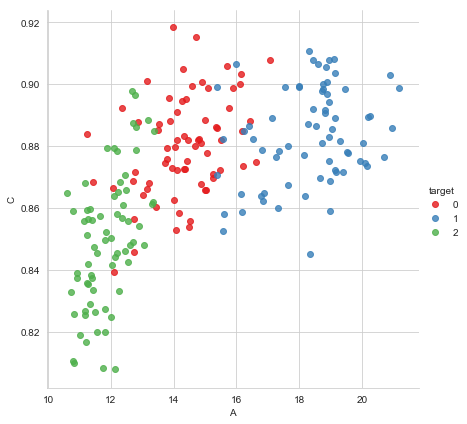

In [5]:
sns.lmplot('A','C',data=df, hue='target',
           palette='Set1',size=6,aspect=1,fit_reg=False);

**How area 'A' is related to the A_Coef?**

C:\Users\Dell\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


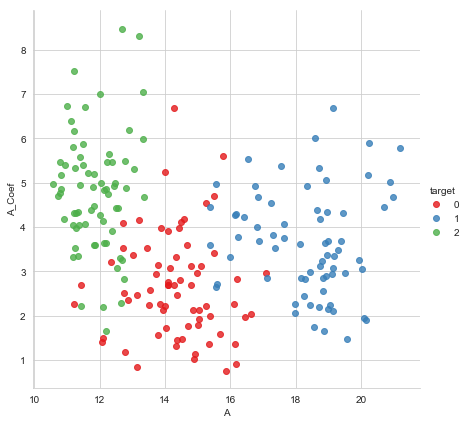

In [6]:
sns.lmplot('A','A_Coef',data=df, hue='target',
           palette='Set1',size=6,aspect=1,fit_reg=False);

C:\Users\Dell\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


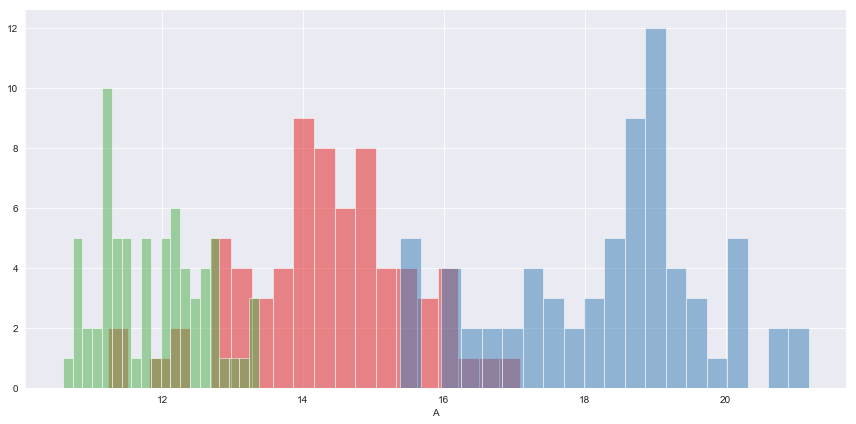

In [7]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue='target',palette='Set1',size=6,aspect=2)
g = g.map(plt.hist,'A',bins=20,alpha=0.5);

## KMeans Clustering

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df.drop('target',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [9]:
centers = kmeans.cluster_centers_
centers

array([[14.64847222, 14.46041667,  0.87916667,  5.56377778,  3.27790278,
         2.64893333,  5.19231944],
       [18.72180328, 16.29737705,  0.88508689,  6.20893443,  3.72267213,
         3.60359016,  6.06609836],
       [11.96441558, 13.27480519,  0.8522    ,  5.22928571,  2.87292208,
         4.75974026,  5.08851948]])

In [10]:
df['klabels'] = kmeans.labels_
df.head()

,A,P,C,LK,WK,A_Coef,LKG,target,klabels
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0,0


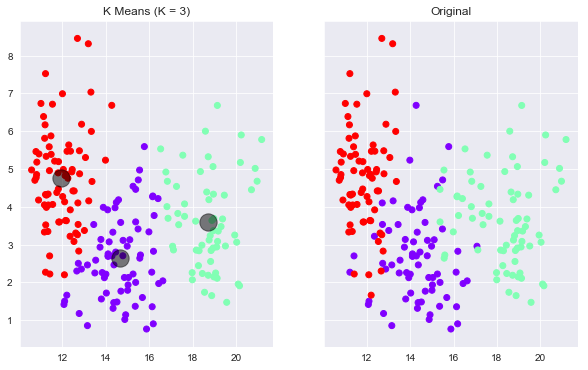

In [11]:
f, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2,
                             sharey = True, figsize = (10,6))

ax1.set_title('K Means (K = 3)')
ax1.scatter(x = df['A'], y = df['A_Coef'], 
            c = df['klabels'], cmap='rainbow')
ax1.scatter(x=centers[:, 0], y=centers[:, 5],
            c='black',s=300, alpha=0.5)

ax2.set_title("Original")
ax2.scatter(x = df['A'], y = df['A_Coef'], 
            c = df['target'], cmap='rainbow');

## Elbow point

In [12]:
sum_square = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k).fit(df.drop('target',axis=1))
    sum_square[k] = kmeans.inertia_ 

In [13]:
sum_square

{1: 2868.733362558905,
 2: 1147.6773582221927,
 3: 587.3186115940427,
 4: 482.7137071369965,
 5: 404.67287383994056,
 6: 342.43585354887614,
 7: 292.283490786,
 8: 261.0773329021886,
 9: 230.36047665518544}

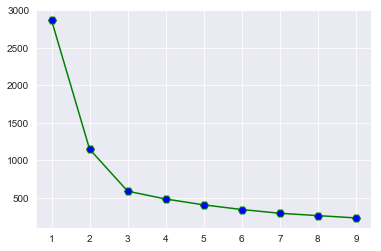

In [14]:
plt.plot(list(sum_square.keys()), list(sum_square.values()),
         linestyle ='-', marker = 'H', color = 'g',
         markersize = 8,markerfacecolor = 'b');